# Student Activity: Financial Forecasting

In this activity, Harold's manager wants Harold to take a look at one year's worth of `TSLA` stock prices and plot a potential stock trajectory for where `TSLA` stock prices could go in the next `3` years. In addition, he would like to know how a $10,000 investment would perform given the simulated results.

Help Harold by creating a Monte Carlo simulation that simulates the next `252 * 3` trading days using three years worth of `TSLA` stock data. Plot the simulated results of `TSLA` daily returns over the next `3` years as well as the corresponding simulated outcomes.

## Import Dependencies and Create Alpaca API Environment

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Your alpaca key is {alpaca_key}.")
print(f"Your alpaca secret key is {alpaca_secret_key}.")

api = tradeapi.REST(alpaca_key, alpaca_secret_key, api_version='V2')

Your alpaca key is PKMWQL1LA14C1RK0ZTTC.
Your alpaca secret key is OnzURrqiO6snAtKkNF9K15QQQrQ4YTAi5w211ZhD.


### Get 3 Years Worth of `TSLA` Stock Data via API Call and Read in as DataFrame 

In [3]:
# Set the ticker
tsla_ticker = ['TSLA']

# Set timeframe to '1D'
tsla_timeframe = '1D'

# Set start and end datetimes of 3 years from Today
tsla_start_date = pd.Timestamp('2018-1-1', tz='America/New_York').isoformat()
tsla_end_date = pd.Timestamp('2021-1-1', tz='America/New_York').isoformat()

# Get 3 years worth of historical data for TSLA
tsla_df = api.get_barset(tsla_ticker, timeframe=tsla_timeframe, start=tsla_start_date, end=tsla_end_date, limit=1000).df

tsla_df.head()

TSLA                                   
                             open      high     low   close   volume
time                                                                
2018-01-02 00:00:00-05:00  312.18  322.1099  311.00  320.29  3322648
2018-01-03 00:00:00-05:00  321.00  325.2500  315.55  317.01  3232166
2018-01-04 00:00:00-05:00  312.87  318.5500  305.68  314.62  7428996
2018-01-05 00:00:00-05:00  316.62  317.2400  312.00  316.55  3563882
2018-01-08 00:00:00-05:00  316.00  337.0199  315.50  336.41  7721537

### Run the Monte Carlo Simulation

In [4]:
# Set number of simulations
num_of_sim = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
tsla_mc = MCSimulation(portfolio_data=tsla_df, weights=[1], num_simulation=num_of_sim, num_trading_days=252*3)

tsla_mc.portfolio_data.shape

(756, 6)

In [5]:
# Run Monte Carlo simulations to forecast three years daily returns
tsla_mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.018461,0.996993,0.987858,0.966105,1.035460,0.977627,0.996584,0.913510,0.960998,0.859051,...,0.989683,0.933374,1.018414,1.022035,1.093777,0.971038,0.917546,0.961872,1.013460,1.028642
2,0.953310,1.010540,0.989460,1.022911,1.016920,0.971099,0.933890,0.862488,1.062925,0.906445,...,0.939008,0.945516,0.948240,0.930339,1.073355,0.898142,0.904258,1.054204,1.027920,1.086245
3,0.965234,0.996914,0.941556,1.013546,0.930273,1.021473,0.929199,0.838321,0.956752,0.962208,...,0.973962,0.889517,0.938114,0.977533,1.047474,0.932586,0.859171,1.030818,1.015527,1.163254
4,0.968693,0.911070,0.877903,0.948115,0.954775,1.037901,0.982444,0.852457,0.952391,0.932277,...,0.973786,0.959479,0.964228,1.012599,1.043207,0.952316,0.924738,1.061206,0.996929,1.230795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.199971,2.416768,9.390662,0.048886,6.097694,1.780085,2.170090,0.459939,3.618405,2.335606,...,2.816483,0.230371,5.264482,6.431355,1.004171,1.160848,5.060232,10.870614,27.623894,2.003133
753,1.102712,2.399295,9.275893,0.045531,6.503810,1.941141,2.113063,0.496226,3.816349,2.340946,...,2.821439,0.211084,5.673169,5.641026,0.910607,1.192491,5.074688,11.637151,25.940818,1.871925
754,1.117396,2.421229,8.989752,0.044894,6.487509,2.008579,2.102807,0.466621,4.199834,2.177294,...,2.616738,0.205990,5.951915,5.636444,0.906945,1.132059,5.086447,11.383250,28.144057,2.022604
755,1.119579,2.447333,9.631176,0.042659,6.648314,2.054806,1.878995,0.464618,4.396477,2.214082,...,2.375906,0.219477,6.030784,5.121444,0.824076,1.192173,5.413641,10.526111,27.472505,2.101975


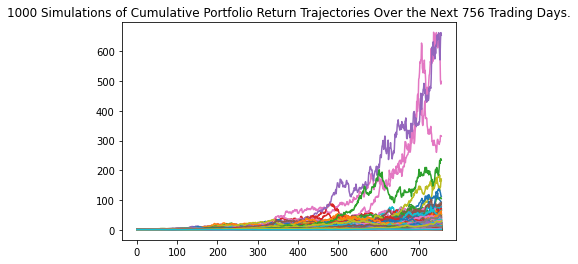

In [24]:
tsla_line_plot = tsla_mc.plot_simulation()

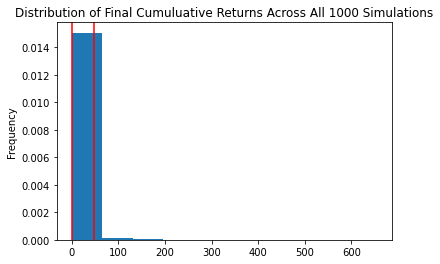

In [7]:
tsla_dist_plot = tsla_mc.plot_distribution()

### Create a new DataFrame to hold the summary statistics for the simulated daily returns.

In [26]:
# Compute summary statistics from the simulated daily returns
tsla_summary = tsla_mc.summarize_cumulative_return()
print(tsla_summary)

# Create a DataFrame with the summary statistics
tsla_summary = {
    'mean': list(tsla_mc.simulated_return.mean(axis=1)),
    'median': list(tsla_mc.simulated_return.median(axis=1)),
    'max': list(tsla_mc.simulated_return.max(axis=1)),
    'min': list(tsla_mc.simulated_return.min(axis=1))
}

tsla_summary_df = pd.DataFrame(tsla_summary)

# Display sample data
print()
tsla_summary_df.tail()

count           1000.000000
mean               9.945865
std               31.741735
min                0.046346
25%                1.283435
50%                3.435742
75%                9.110691
max              653.609879
95% CI Lower       0.255043
95% CI Upper      48.520101
Name: 756, dtype: float64



,mean,median,max,min
752,9.918373,3.344054,658.356516,0.048886
753,9.834962,3.338660,582.554199,0.045531
754,9.892996,3.353137,633.917897,0.044894
755,9.897222,3.382465,662.103127,0.042659
756,9.945865,3.435742,653.609879,0.046346


### Generate a line plot to visualize the summary statistics for the simulated daily returns

<AxesSubplot:>

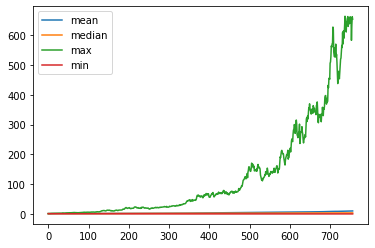

In [9]:
# Use the `plot` function to visually analyze the trajectory of TSLA stock daily returns on the next three years of trading days simulation
tsla_summary_df.plot(title='Simulated daily returns for TSLA over 3 years')

### Create a new DataFrame to hold the summary statistics for the simulated daily returns assuming an initial investment of `$10,000`

In [11]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
projected_simulated_daily_returns = initial_investment * tsla_summary_df

# Display sample data
projected_simulated_daily_returns.head()

,mean,median,max,min
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10026.243566,10028.384289,11848.015545,8429.397442
2,10090.446397,10062.074763,12325.786053,8051.036419
3,10129.598670,10102.986878,13021.217920,7792.658222
4,10159.345242,10125.861134,13646.215210,7194.822851


### Generate a line plot to visualize the updated summary statistics for simulated daily returns using a `$10,000` initial investment

<AxesSubplot:title={'center':'Simulated returns'}>

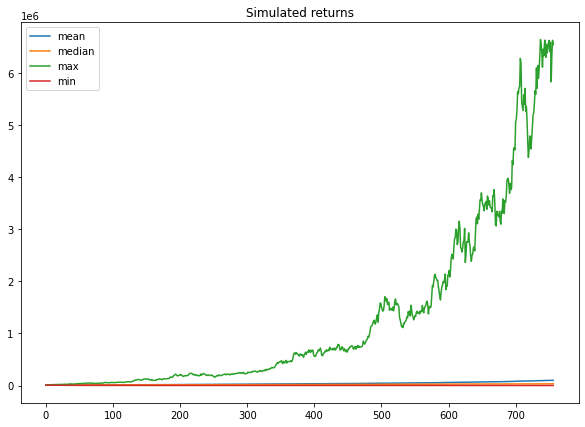

In [16]:
# Use the 'plot' function to create a chart of the simulated profits/losses
projected_simulated_daily_returns.plot(title='Simulated returns', figsize=(10, 7))

### Calculate the range of possible outcomes for our $10,000 investment with a `95%` confidence interval

In [17]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = tsla_mc.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               9.945865
std               31.741735
min                0.046346
25%                1.283435
50%                3.435742
75%                9.110691
max              653.609879
95% CI Lower       0.255043
95% CI Upper      48.520101
Name: 756, dtype: float64


In [20]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = tbl[8] * 10000
ci_upper = tbl[9] * 10000

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 3 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 3 years will end within the range of $2550.4270009426446 and $485201.00783992675.
